In [0]:
# Fill in your name using the format below and student ID number
your_name = "Qian, Chen"
student_id = "1443348"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

     |████████████████████████████████| 163kB 2.8MB/s 


In [4]:
# Uncomment the following line to run in Google Colab
# %tensorflow_version 2.x
import tensorflow as tf
# tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Chen, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
# base_dir = '/content/drive/My Drive/assignment-3-Chen-Qian-s'
base_dir = './'

In [8]:
#Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

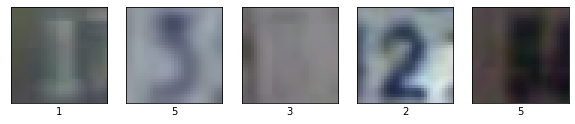

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    # if a json description is available, load config and then weights
    if os.path.isfile(os.path.join(base_dir, name+'.json')):
      json_file = open(os.path.join(base_dir, name+'.json'), 'r')
      loaded_model_json = json_file.read()
      json_file.close()
      model = model_from_json(loaded_model_json)
      model.load_weights(os.path.join(base_dir, name+extension))
    # else just load the entire model from hdf5 file
    else:
      model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  path = os.path.join(base_dir, name+extension)
  model.save(path)
  size = os.path.getsize(path)
  # If model > 100MB, store the weights and architecture only.
  if size > 100*1024*1024:
    print("Model larger than 100MB, storing weights only.")
    model.save_weights(path)
    model_json = model.to_json()
    with open(os.path.join(base_dir, name+".json"), "w") as json_file:
        json_file.write(model_json)

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Training the model
Epoch 1/50
318/318 [==============================] - 1s 4ms/step - loss: 2.2424 - accuracy: 0.1856 - val_loss: 2.2028 - val_accuracy: 0.1979
Epoch 2/50
318/318 [==============================] - 1s 4ms/step - loss: 1.9048 - accuracy: 0.3094 - val_loss: 1.5853 - val_accuracy: 0.4388
Epoch 3/50
318/318 [==============================] - 1s 4ms/step - loss: 1.5067 - accuracy: 0.4831 - val_loss: 1.4417 - val_accuracy: 0.5134
Epoch 4/50
318/318 [==============================] - 1s 4ms/step - loss: 1.3302 - accuracy: 0.5637 - val_loss: 1.2701 - val_accuracy: 0.5909
Epoch 5/50
318/318 [==============================] - 1s 4ms/step - loss: 1.2087 - accuracy: 0.6156 - val_loss: 1.1541 - val_accuracy: 0.6455
Epoch 6/50
318/318 [==============================] - 1s 4ms/step - loss: 1.1202 - accuracy: 0.6481 - val_loss: 1.1346 - val_accuracy: 0.6432
Epoch 7/50
318/318 [==============================] - 1s 4ms/step - loss: 1.0545 - accuracy: 0.6722 - val_loss: 1.0733 - val_accu

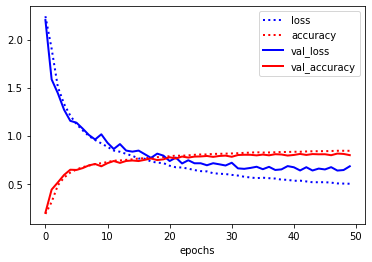

In [0]:
from tensorflow.keras import models, layers, optimizers 

def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  #model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), #Adagrad(learning_rate=0.01),
                  loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=50, batch_size=200)

answer_q_1_1 = """Hidden layers have more neurons than the output. Softmax suits for multiclassification. Adam outperforms other adaptive techniques
 in deepnets. Categorical_crossentropy is preferred under the inference framework of maximum likelihood. I also tried other optimizers and loss 
 functions. More layers don't worth it and batch size is tuned for higher accuracy and less time. Final accuracy is over 80 and hasn't convergent 
 yet. But it tends to overfit a bit as val_loss is higher than loss."""

print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

Training the model
Epoch 1/50
318/318 [==============================] - 1s 3ms/step - loss: 2.1756 - accuracy: 0.2153 - val_loss: 1.8757 - val_accuracy: 0.3380
Epoch 2/50
318/318 [==============================] - 1s 3ms/step - loss: 1.7015 - accuracy: 0.3946 - val_loss: 1.6051 - val_accuracy: 0.4334
Epoch 3/50
318/318 [==============================] - 1s 3ms/step - loss: 1.5303 - accuracy: 0.4655 - val_loss: 1.4652 - val_accuracy: 0.5045
Epoch 4/50
318/318 [==============================] - 1s 3ms/step - loss: 1.3735 - accuracy: 0.5459 - val_loss: 1.3381 - val_accuracy: 0.5649
Epoch 5/50
318/318 [==============================] - 1s 3ms/step - loss: 1.2260 - accuracy: 0.6041 - val_loss: 1.2441 - val_accuracy: 0.6032
Epoch 6/50
318/318 [==============================] - 1s 3ms/step - loss: 1.1337 - accuracy: 0.6428 - val_loss: 1.1569 - val_accuracy: 0.6364
Epoch 7/50
318/318 [==============================] - 1s 3ms/step - loss: 1.0705 - accuracy: 0.6661 - val_loss: 1.0579 - val_accu

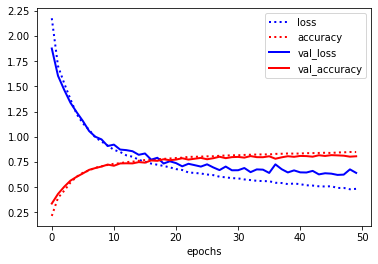

In [0]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  #model.add(layers.Dense(512, activation="relu"))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), #Adagrad(learning_rate=0.01),
                  loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=200)
answer_q_1_2 = """I tried to add one more layer but it's still not worth it. As grayscale reduces the parameters of neural network 
to a third of colorscale which allows a more complex model. I also found the performance on grayscale data is slightly better than 
colorscale with faster speed. The loss decreases more repidly at the first several iterations. As less parameters reduces the curse 
of dimensionality, needs less number of iterations to train and more unlikely to overfit."""

print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Training the model
Epoch 1/50
636/636 [==============================] - 2s 3ms/step - loss: 2.2557 - accuracy: 0.2058 - val_loss: 2.0266 - val_accuracy: 0.2829
Epoch 2/50
636/636 [==============================] - 2s 3ms/step - loss: 1.8530 - accuracy: 0.3580 - val_loss: 1.7596 - val_accuracy: 0.4111
Epoch 3/50
636/636 [==============================] - 2s 3ms/step - loss: 1.6783 - accuracy: 0.4347 - val_loss: 1.6260 - val_accuracy: 0.4594
Epoch 4/50
636/636 [==============================] - 2s 3ms/step - loss: 1.6122 - accuracy: 0.4642 - val_loss: 1.6081 - val_accuracy: 0.4692
Epoch 5/50
636/636 [==============================] - 2s 3ms/step - loss: 1.5646 - accuracy: 0.4845 - val_loss: 1.5357 - val_accuracy: 0.5010
Epoch 6/50
636/636 [==============================] - 2s 3ms/step - loss: 1.5131 - accuracy: 0.5083 - val_loss: 1.5008 - val_accuracy: 0.5185
Epoch 7/50
636/636 [==============================] - 2s 3ms/step - loss: 1.4800 - accuracy: 0.5262 - val_loss: 1.4637 - val_accu

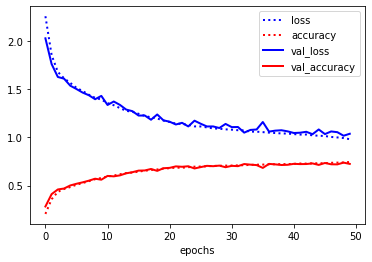

In [0]:
from tensorflow.keras import regularizers, models, layers, optimizers, initializers 

def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  #kernel_initializer=initializers.Orthogonal, bias_regularizer=regularizers.l2(0.001), activity_regularizer=regularizers.l2(0.001)
  model.add(layers.Dense(120, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(100, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(70, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(40, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), #Adagrad(learning_rate=0.01),
                  loss='categorical_crossentropy', metrics=['accuracy'])
  return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=100)

answer_q_1_3 = """For kernel_regularizer, I tried l1, l2 and l1_l2, l2 works best. I tried l2 for bias and activity, and other kernel_initializers 
like orthogonal, but they reduce the accuracy. And adding dropout either after each layer or some layers reduces accuracy significantly. Reducing 
the number of neurons helps. Regularization does help the model not to be overfitting as val results are very close to train results. Also the model
needs more epochs to converge with accuracy over 80 after 100 epochs."""

print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Training the model
Epoch 1/50
636/636 [==============================] - 7s 11ms/step - loss: 1.2205 - accuracy: 0.7571 - val_loss: 0.8172 - val_accuracy: 0.8730
Epoch 2/50
636/636 [==============================] - 6s 10ms/step - loss: 0.6976 - accuracy: 0.8953 - val_loss: 0.6052 - val_accuracy: 0.9100
Epoch 3/50
636/636 [==============================] - 6s 10ms/step - loss: 0.5734 - accuracy: 0.9129 - val_loss: 0.6634 - val_accuracy: 0.8732
Epoch 4/50
636/636 [==============================] - 6s 10ms/step - loss: 0.5174 - accuracy: 0.9212 - val_loss: 0.5367 - val_accuracy: 0.9110
Epoch 5/50
636/636 [==============================] - 6s 10ms/step - loss: 0.4932 - accuracy: 0.9264 - val_loss: 0.5245 - val_accuracy: 0.9122
Epoch 6/50
636/636 [==============================] - 6s 10ms/step - loss: 0.4776 - accuracy: 0.9292 - val_loss: 0.5118 - val_accuracy: 0.9146
Epoch 7/50
636/636 [==============================] - 6s 10ms/step - loss: 0.4705 - accuracy: 0.9302 - val_loss: 0.4487 - v

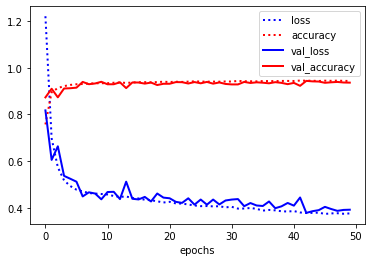

In [0]:
from tensorflow.keras import regularizers, models, layers, optimizers, initializers 

def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.BatchNormalization())
  # model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
  # model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.BatchNormalization())
  # model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
  # model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.BatchNormalization())
  # model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
  # model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), #.RMSprop(lr=1e-3),
                loss='categorical_crossentropy',metrics=['accuracy'])

  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
                train=True, epochs=50, batch_size=100)
answer_q_2_1 = """I tried a simple model with 3 conv2D layers in pyramid structure and also mimicked the VGG16 model. The latter 
has higher accuracy though slower. I also tried several structures in the mimicked model, like 3 conv2D layers between max_poolings, 
but not better. I also added dropout and batch normalization. Batch normalization standardizes the inputs for each minibatch and has
the effect of stabilizing the learning process and reducing the number of training epochs required to train deep networks. To prevent 
overfitting, I also added regularizers to each layer and training accuracy derease 4% but val_accuracy only 0.4%. My model has a high accuracy
but fluctuating, it's sensitive to noise. I also tried filter with size(5, 5), other dropout amount, etc. with no better results."""

print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Training the model
Epoch 1/50
60/60 [==============================] - 1s 21ms/step - loss: 3.0968 - accuracy: 0.1531 - val_loss: 2.8201 - val_accuracy: 0.1156
Epoch 2/50
60/60 [==============================] - 1s 18ms/step - loss: 2.7388 - accuracy: 0.2193 - val_loss: 3.0390 - val_accuracy: 0.0711
Epoch 3/50
60/60 [==============================] - 1s 18ms/step - loss: 2.3670 - accuracy: 0.3703 - val_loss: 3.0013 - val_accuracy: 0.1302
Epoch 4/50
60/60 [==============================] - 1s 19ms/step - loss: 1.8334 - accuracy: 0.5568 - val_loss: 2.3140 - val_accuracy: 0.4970
Epoch 5/50
60/60 [==============================] - 1s 19ms/step - loss: 1.5875 - accuracy: 0.6516 - val_loss: 1.9610 - val_accuracy: 0.5637
Epoch 6/50
60/60 [==============================] - 1s 19ms/step - loss: 1.4226 - accuracy: 0.6875 - val_loss: 1.6416 - val_accuracy: 0.6392
Epoch 7/50
60/60 [==============================] - 1s 19ms/step - loss: 1.3589 - accuracy: 0.7359 - val_loss: 1.5661 - val_accuracy: 0

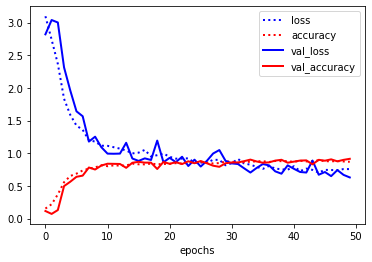

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_split = preprocessed_split

train_datagen = ImageDataGenerator(
    rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # zoom_range=0.05,
    fill_mode='nearest'
    # shear_range=0.1,
    # channel_shift_range=0.2, 
    # featurewise_std_normalization=True,
    # zca_whitening=True, # reduce data dimentionality and noise
    # zca_epsilon=1e-6,
    # brightness_range = [0.1, 0.9],
)

it_train = train_datagen.flow(augmented_split[0], augmented_split[2], batch_size=32)

run_evaluation("model_2_2", build_model_2_1, (it_train, augmented_split[1], augmented_split[3]), base_dir, 
               train=True, epochs=50, batch_size=100, generator=True)

answer_q_2_2 = """As we should augment data accordingly, I precluded senseless transformations, e.g. either vertical nor horizontal flip changes 
the number and can seldom happen in this data. Then I compared the results after the transformations one by one alone with the result of default 
setting and try to combine them. Also I find that it's common for original images to be rotated a bit. The val_accuracy is a bit higher than accuracy,
 so it generalizes better as it's trained on a more generalized dataset."""

print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

0.9103635814281398


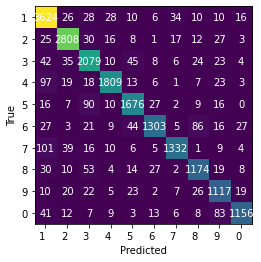

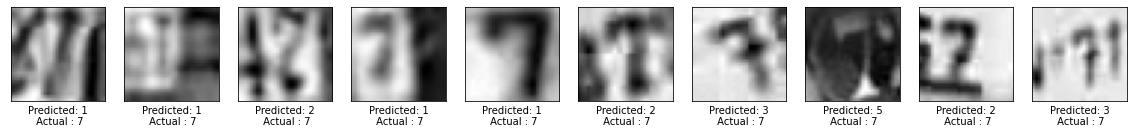

Answer is 425 characters long


In [0]:
# calculate test accuracy of model_2_2
model_3_1 = load_model_from_file(base_dir, "model_2_2", extension='.h5')
y_pred_3_1 = model_3_1.predict(rgb2gray(X_test))
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred_3_1, axis=1))[0]
print(1 - len(misclassified_samples)/len(y_test))

test_accuracy_3_1 = 0.9104


from sklearn.metrics import confusion_matrix

cifar_classes = {0: "1", 1: "2", 2: "3", 3: "4", 4: "5",
                 5: "6", 6: "7", 7: "8", 8: "9", 9: "0"}

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_3_1, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(list(cifar_classes.values()), ha="right")
  ax.set_yticklabels(list(cifar_classes.values()))
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")


def plot_misclassifications():
  tlabel = 7
  
  ## all misclassified_samples, reshape grayscale data to be valid input for imshow()
  X_test_mis = rgb2gray(X_test)[misclassified_samples].reshape((len(misclassified_samples), 32, 32))
  y_test_mis = y_test[misclassified_samples]
  y_pred_mis = y_pred_3_1[misclassified_samples]

  ## find misclassifications of number 7
  y_test_label = np.argmax(y_test_mis, axis=1)+1
  indices_num_p = np.argwhere(y_test_label==tlabel)
  indices_num = indices_num_p.reshape((len(indices_num_p),))
  X_test_mis_num = X_test_mis[indices_num]
  y_test_mis_num = y_test_mis[indices_num]
  y_pred_mis_num = y_pred_mis[indices_num]

  ## randomly pick 10 pictures
  images = [randint(0, len(indices_num)) for i in range(10)]
  X_test_random = [X_test_mis_num[i] for i in images]
  y_test_random = [y_test_mis_num[i] for i in images]
  y_pred_random = [y_pred_mis_num[i] for i in images]

  fig, axes = plt.subplots(1, 10, figsize = (20, 5))
  for i in range(10):
    axes[i].imshow(X_test_random[i], cmap='gray')
    axes[i].set_xlabel("Predicted: %s\n Actual : %s" % (cifar_classes[np.argmax(y_pred_random[i])],
                                                          cifar_classes[np.argmax(y_test_random[i])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
  plt.show();

plot_confusion_matrix()
plot_misclassifications()

answer_q_3_1 = """The most frequent misclassified cases are that 5 is predicted as 3, 4 and 7 are taken as 1, 6 is predicted as 8 and 0 is to 9
. And 9 seems to be the most rightly predicted number. I looked into the case of 7. Except that many of the grayscale images are vague and in 
low quality even for me to tell, I also found background (e.g. shape of shadow, other numbers on the side) and rotated part of 7 can be mistaken 
as 1 or 2."""

print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


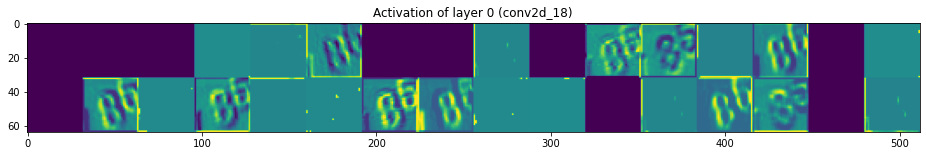

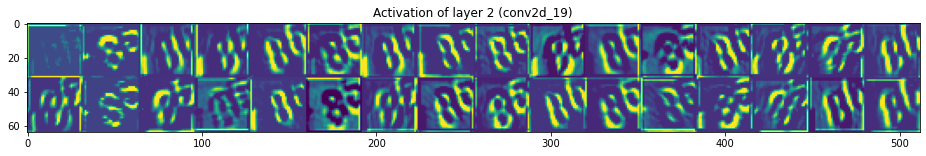

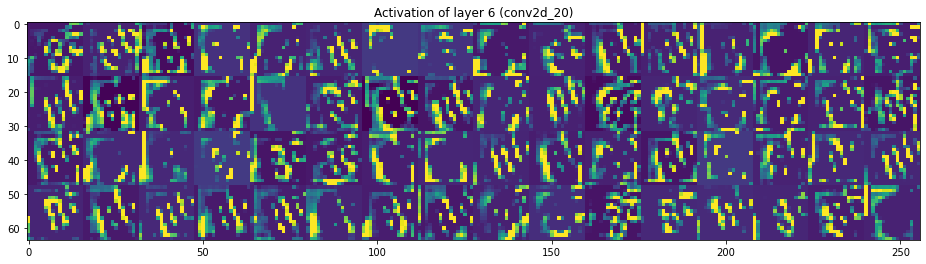

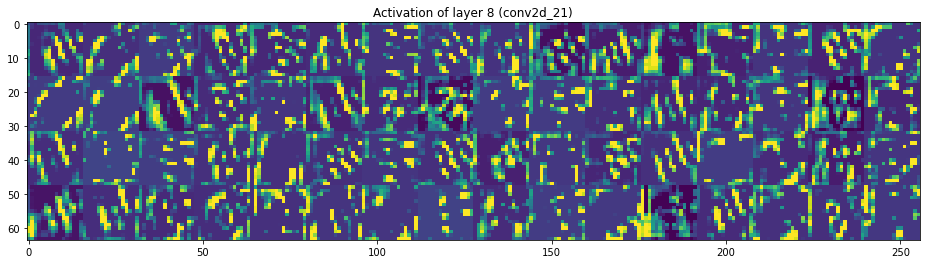

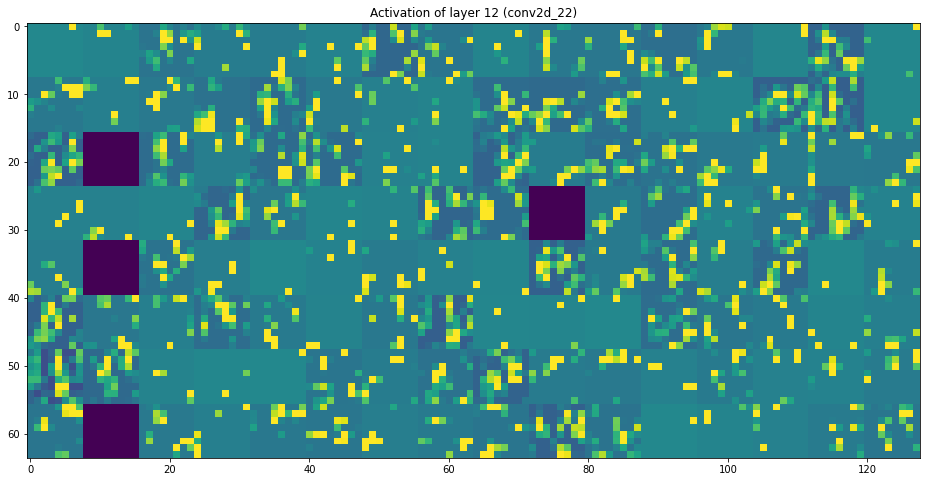

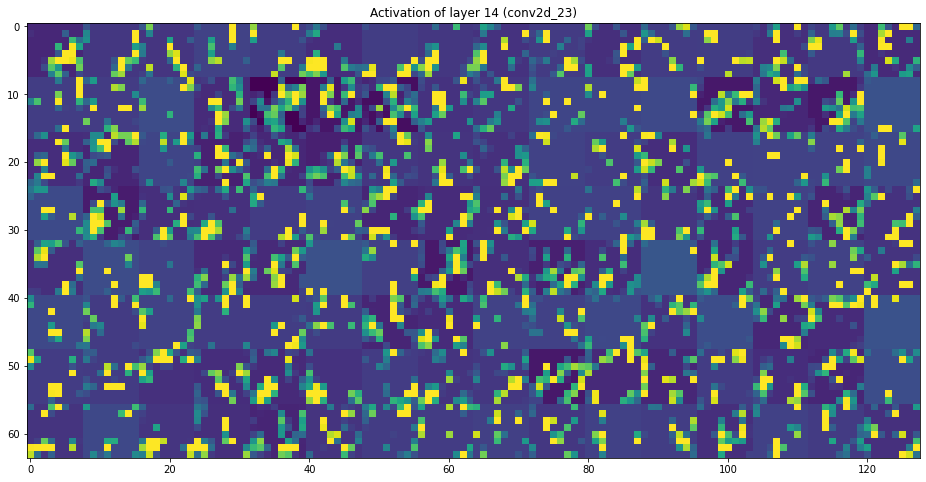

Answer is 440 characters long


In [0]:
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image

img_tensor = rgb2gray(X_test)[0]
img_tensor = np.expand_dims(img_tensor, axis=0) 

# print top convolutional layers except flattern and dense layer
def plot_activations():
  model_3_2 = load_model_from_file(base_dir, "model_2_2", extension='.h5')
  layer_outputs = [layer.output for layer in model_3_2.layers[:18]]
  activation_model = models.Model(inputs=model_3_2.input, outputs=layer_outputs)
  activations = activation_model.predict(img_tensor)

  images_per_row = 16
  layer_names = []
  for layer in model_3_2.layers[:18]:
    layer_names.append(layer.name)

  layer_index = [0, 2, 6, 8, 12, 14]
  for i in layer_index:
    layer_name, layer_activation = layer_names[i], activations[i]
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
      for row in range(images_per_row):
        channel_image = layer_activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title("Activation of layer {} ({})".format(i,layer_name))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()

plot_activations()

answer_q_3_2 = """Shallow layers recognize concrete features (e.g. borders, edges), while deeper ones extract more abstract and general patterns.
There are empty filters on the 1st and 13th layer as the image doesn't contain some information the filters are interested in. But after a batch 
normalization layer, the next layer doesn't show empty filters and the color becomes darker. Different filters have various focus, e.g. some on 
color, some on edges."""

print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

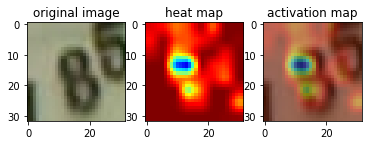

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import cv2
import tensorflow as tf

# Because tensorflow 2.* eager_execution is enabled defaultly
tf.compat.v1.disable_eager_execution()

img = rgb2gray(X_test)[0].astype('float32')
img = np.expand_dims(img, axis=0) 

def plot_3_3():
  K.clear_session()
  model_3_3 = load_model_from_file(base_dir, "model_2_2", extension='.h5')
  
  # should be 7
  image_output = model_3_3.output[:, 7]
  last_conv_layer = model_3_3.get_layer('conv2d_23')

  grads = K.gradients(image_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model_3_3.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img])

  for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (32, 32))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# although the model is trained on grayscaled data, I show the activation map on the rgb image.
  img_rgb = np.uint8(255 * X_test[0])
  superimposed_img = cv2.addWeighted(img_rgb, 0.6, heatmap, 0.4, 0)
  fig, axes = plt.subplots(1, 3)
  axes[0].imshow(img_rgb)
  axes[0].set_title('original image')
  axes[1].imshow(heatmap)
  axes[1].set_title('heat map')
  axes[2].imshow(superimposed_img)
  axes[2].set_title('activation map')

plot_3_3()


## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

58892288/58889256 [==============================] - 1s 0us/step
Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/15
63544/63544 [==============================] - 16s 245us/sample - loss: 1.2774 - accuracy: 0.5637 - val_loss: 0.6040 - val_accuracy: 0.8360
Epoch 2/15
63544/63544 [==============================] - 15s 236us/sample - loss: 0.5184 - accuracy: 0.8583 - val_loss: 0.4616 - val_accuracy: 0.8652
Epoch 3/15
63544/63544 [==============================] - 15s 237us/sample - loss: 0.4073 - accuracy: 0.8877 - val_loss: 0.3889 - val_accuracy: 0.8917
Epoch 4/15
63544/63544 [==============================] - 15s 235us/sample - loss: 0.3597 - accuracy: 0.9024 - val_loss: 0.3701 - val_accuracy: 0.8961
Epoch 5/15
63544/63544 [==============================] - 15s 235us/sample - loss: 0.3263 - accuracy: 0.9122 - val_loss: 0.3576 - val_accuracy: 0.8980
Epoch 6/15
63544/63544 [==============================] - 15s 235us/sample - loss: 0.2996 - accuracy: 0.9190 - 

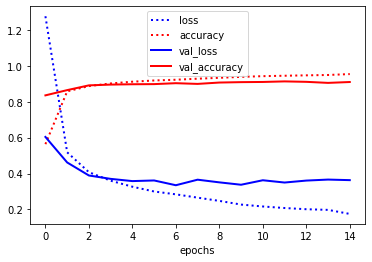

In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_model_4_1():
  conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  conv_base.trainable = True
  # so that the last few layers after "XXX" will be unfrozen 
  set_trainable = False
  for layer in conv_base.layers:
    if layer.name == 'block4_conv1':
      set_trainable = True
    if set_trainable:
      layer.trainable = True
    else:
      layer.trainable = False

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='sigmoid'))
  
  model.compile(optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

  return model
    
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, train=True, epochs=15, batch_size=100)

answer_q_4_1 = """It's obvious that unfreezing VGG16 base can help a lot to improve accuracy. Otherwise if only 1 dense layer can train, it is too 
simple to work well (accuracy < 60%). When unfreezing the last few layers of VGG16 base with or without regularization, val_loss is often pretty more 
than loss. And val_loss starts to increase after several epochs. The model tends to overfitting easily. If I train with the whole VGG16 base, I get a 
very safisfying result (no overfitting). But considering time, I only release part of VGG16 base and reduce epochs."""

print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [18]:
# MaxAbsScaler is devised for sparse data, and the train/test_features are sparse
import pickle
import gzip
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, PowerTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import ShuffleSplit


def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model_4_2 = load_model_from_file(base_dir, "model_4_1", extension='.h5')
  conv_base = model_4_2.get_layer('vgg16')
  train = conv_base.predict(X_train)
  test = conv_base.predict(X_test)
  val = conv_base.predict(X_val)

  train_features = np.reshape(train, (train.shape[0], 512)) 
  test_features = np.reshape(test, (test.shape[0], 512)) 
  val_features = np.reshape(val, (val.shape[0], 512)) 

  store_embedding(train_features, "train_features")
  store_embedding(test_features, "test_features")
  store_embedding(val_features, "val_features")

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  preprocess = make_pipeline(Normalizer())
  return Pipeline(steps=[('preprocess', preprocess), ('clf', SVC(kernel='rbf', random_state=1))])

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
  evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  model = pipeline.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mis_classified = (y_pred != y_test)*1
  test_ac = 1 - np.sum(mis_classified)/len(mis_classified)
  print("test_accuracy", test_ac)
  return test_ac

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  X_train_4 = load_embedding("train_features")
  X_test_4 = load_embedding("test_features") 
  y_train_4 = np.argmax(y_train, axis = 1) + 1
  y_test_4 = np.argmax(y_test, axis = 1) + 1
   
  pipeline = generate_pipeline()
  return evaluate_pipeline(pipeline, X_train_4, y_train_4, X_test_4, y_test_4)

# I have run this code once.
# store_embeddings()

evaluation_4_2(X_train, y_train, X_test, y_test)

answer_q_4_2 = """For model selection, I tried LogisticRegression(LR), SVC and RandomForest(RF) with 5 scalars and without any. From the result 
of validation data, the best accuracy is 0.91 attained by LR and SVC with Normalizer(N). As SVC has more stable performance with other scalers, I 
picked SVC with N as the pipeline to evaluate, fit it with training data and get a test accuracy of 0.91. Higher than my other models. It also
 shows the output by CNN is much more recognizable to computer than original data."""
               
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

test_accuracy 0.9167086312821029
Pipeline: Pipeline(memory=None,
         steps=[('preprocess',
                 Pipeline(memory=None,
                          steps=[('normalizer',
                                  Normalizer(copy=True, norm='l2'))],
                          verbose=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 499 characters long


In [0]:
# Use X_val and y_val to compare different pipelines, but when try verifying, I have removed the output
def generate_pipeline_val(scaler, clf):
  """ Returns an sklearn pipeline.
  """
  preprocess = make_pipeline(scaler)
  return Pipeline(steps=[('preprocess', preprocess), ('clf', clf)])

def evaluate_pipeline_val(X_val_4, y_val_4):
  """model selection helper: pick up a good pipeline setting according to X_val and y_val"""
  cv = StratifiedKFold(3)
  clfs = [LogisticRegression(random_state=1), SVC(kernel='rbf', random_state=1), RandomForestClassifier(random_state=1)]
  scals = [None, StandardScaler(), MaxAbsScaler(), Normalizer(), PowerTransformer(), MinMaxScaler()]
  aucs_total = []
  for clf in tqdm(clfs):
      aucs = []
      for scal in scals:
          pipe = generate_pipeline_val(scaler=scal, clf=clf)
          auc = cross_val_score(pipe, X_val_4, y_val_4,  cv=cv).mean() #scoring='roc_auc',
          aucs.append(auc)
          print('AUC score for {}: {:.2f}'.format(clf.__class__.__name__, auc))
      aucs_total.append(aucs)
  aucs_total = np.reshape(aucs_total, (len(clfs), len(scals))) 
  heatmap(['None', 'StandardScaler', 'MaxAbsScaler', 'Normalizer', 'PowerTransformer', 'MinMaxScaler'], 
          ['LogisticRegression', 'SVC', 'RandomForestClassifier'], aucs_total) 

def heatmap(columns, rows, scores):
  df = pd.DataFrame(scores, index=rows, columns=columns)
  sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt=".3f")


X_val_4 = load_embedding("val_features")
y_val_4 = np.argmax(y_val, axis = 1) + 1
evaluate_pipeline_val(X_val_4, y_val_4)